# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_nom_vs_mpl, plot_simulation_nom_vs_mpl_1, plot_simulation_nom_vs_mpl_2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 1'
S_True = sys_from_file(test_set + ' True')
S_MPL = sys_from_file(test_set + ' MPL')
S_Nom = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 1 True.pickle 

System read from file @ system_model/System Model 1 MPL.pickle 

System read from file @ system_model/System Model 1 Nominal.pickle 



In [3]:
ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.9500


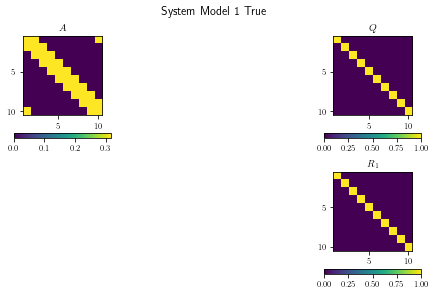

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.9500


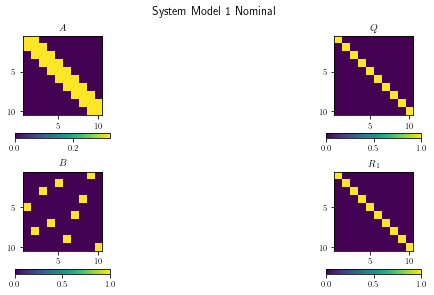

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_nom']['A'])))))
system_display_matrix(ret_sim['system_nom'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.9500


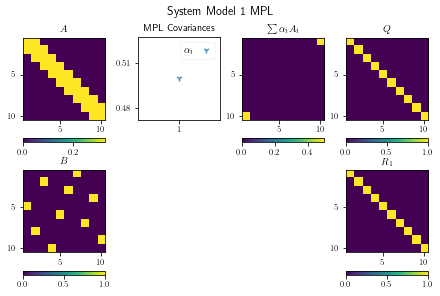

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_mpl']['A'])))))
system_display_matrix(ret_sim['system_mpl'])

#### Simulation - Trajectory, Control Input and Costs

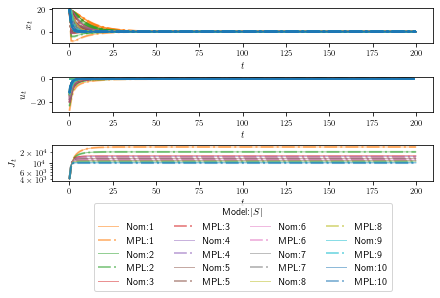

In [7]:
plot_simulation_nom_vs_mpl_1(ret_sim)

#### Actuator set comparison

Control sets are different


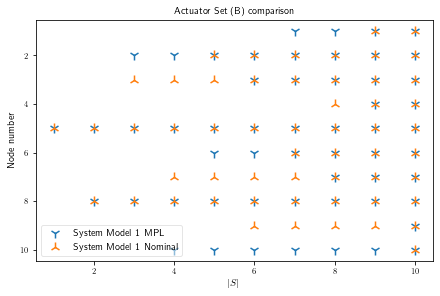

In [8]:
actuator_comparison(ret_sim['system_mpl'], ret_sim['system_nom']);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_Nom']['costs']:
    print ("|S|: %s | Nom: %.4f | MPL: %.4f | Diff (Nom-MPL) %.4f" % (key, ret_sim['T_Nom']['costs'][key][-1], ret_sim['T_MPL']['costs'][key][-1], ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1]))
#     print('|S|:', key, '| Nom:', ret_sim['T_Nom']['costs'][key][-1], '| MPL:', ret_sim['T_MPL']['costs'][key][-1], ' | Diff (Nom-MPL):', ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1])

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 26291.6224 | MPL: 26277.5096 | Diff (Nom-MPL) 14.1129
|S|: 2 | Nom: 19728.3951 | MPL: 19678.8618 | Diff (Nom-MPL) 49.5333
|S|: 3 | Nom: 15758.2399 | MPL: 14833.1283 | Diff (Nom-MPL) 925.1116
|S|: 4 | Nom: 15037.7818 | MPL: 13434.0968 | Diff (Nom-MPL) 1603.6850
|S|: 5 | Nom: 13415.9116 | MPL: 12664.6753 | Diff (Nom-MPL) 751.2363
|S|: 6 | Nom: 12206.0345 | MPL: 11895.9663 | Diff (Nom-MPL) 310.0682
|S|: 7 | Nom: 11791.6587 | MPL: 11431.4561 | Diff (Nom-MPL) 360.2026
|S|: 8 | Nom: 11410.6990 | MPL: 11018.8946 | Diff (Nom-MPL) 391.8044
|S|: 9 | Nom: 10753.7986 | MPL: 10624.2851 | Diff (Nom-MPL) 129.5135
|S|: 10 | Nom: 10298.4039 | MPL: 10220.3008 | Diff (Nom-MPL) 78.1031


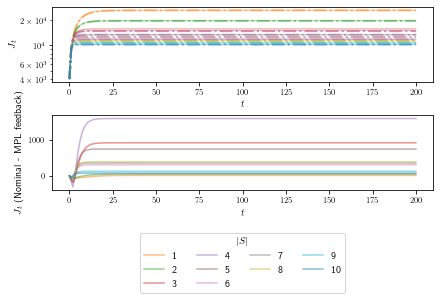

In [10]:
plot_simulation_nom_vs_mpl_2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
